# Visualization and plotting of pokemon datasets

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pk = pd.read_csv("./pokemon.csv")
pk.head()


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [5]:
pk.info()
pk.shape

# seems like 405 out of 807 Pokemon only have one type and type_2 is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


(807, 14)

In [6]:
# check for duplicated rows 
pk.duplicated().sum()

0

In [7]:
pk.nunique()

id                 807
species            807
generation_id        7
height              52
weight             422
base_experience    157
type_1              18
type_2              18
hp                  98
attack             107
defense            106
speed              110
special-attack     103
special-defense     95
dtype: int64

In [8]:
# cast species, type_1, type_2 into categorical varibles

pk["species"] = pk["species"].astype('category')
pk["type_1"] = pk["type_1"].astype('category')
pk["type_2"] = pk["type_2"].astype('category')

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               807 non-null    int64   
 1   species          807 non-null    category
 2   generation_id    807 non-null    int64   
 3   height           807 non-null    float64 
 4   weight           807 non-null    float64 
 5   base_experience  807 non-null    int64   
 6   type_1           807 non-null    category
 7   type_2           405 non-null    category
 8   hp               807 non-null    int64   
 9   attack           807 non-null    int64   
 10  defense          807 non-null    int64   
 11  speed            807 non-null    int64   
 12  special-attack   807 non-null    int64   
 13  special-defense  807 non-null    int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 112.6 KB


In [16]:
sns.set(rc={"figure.figsize":(10, 10)}) 

[Text(0.5, 1.0, 'boxplot')]

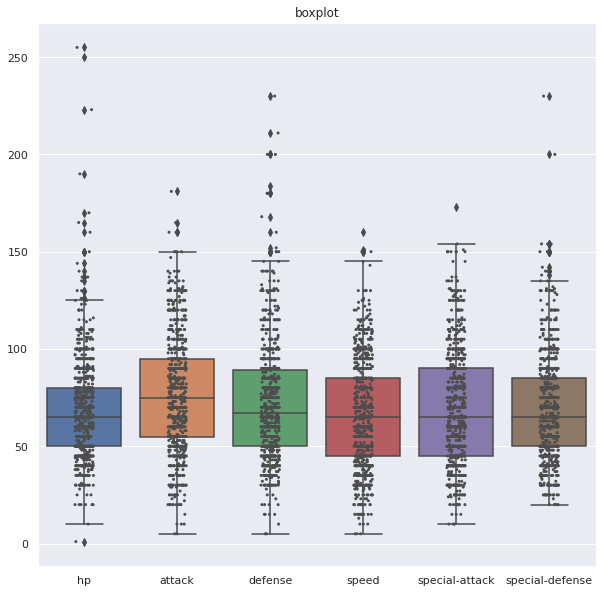

In [17]:
fig = sns.boxplot(data = pk.loc[:, ['hp','attack', 'defense', 'speed', 'special-attack', 'special-defense']] )
fig = sns.stripplot(data = pk.loc[:, ['hp','attack', 'defense', 'speed', 'special-attack', 'special-defense']], color = '.3', size = 3)
fig.set(title = 'boxplot')

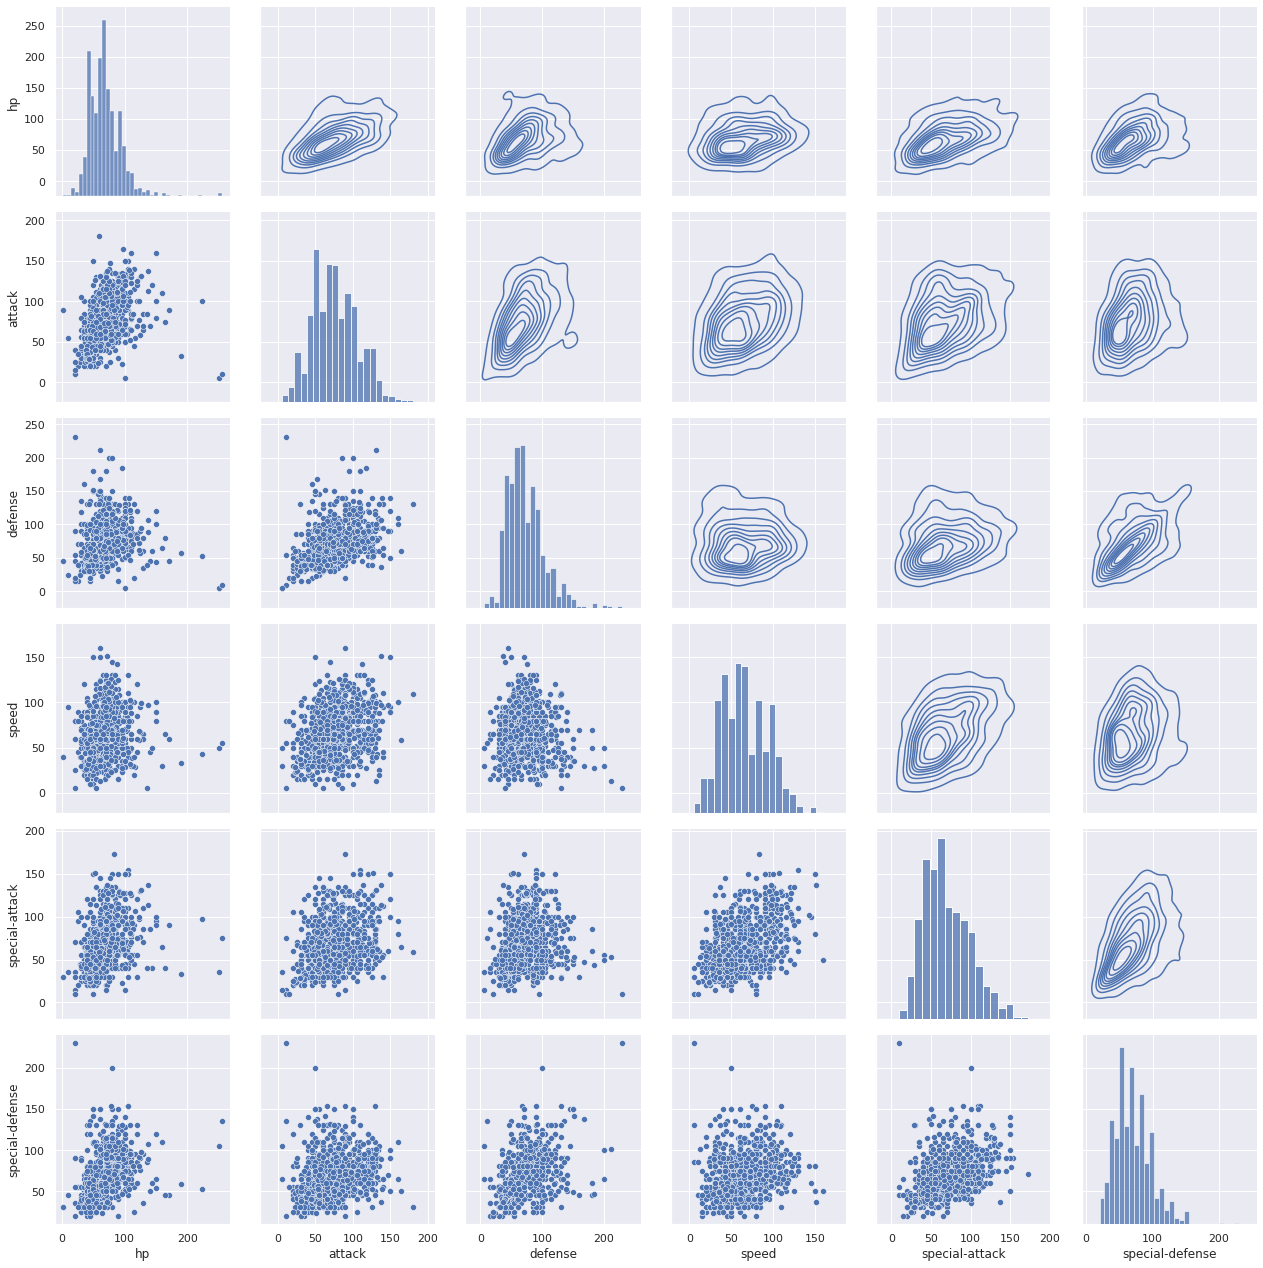

In [18]:
g = sns.PairGrid(data = pk, 
                vars = ['hp','attack','defense','speed','special-attack','special-defense'],
                height = 3)
                
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

The scatterplot is too densed, may use heatmap to visualize the association between different variables

<AxesSubplot:>

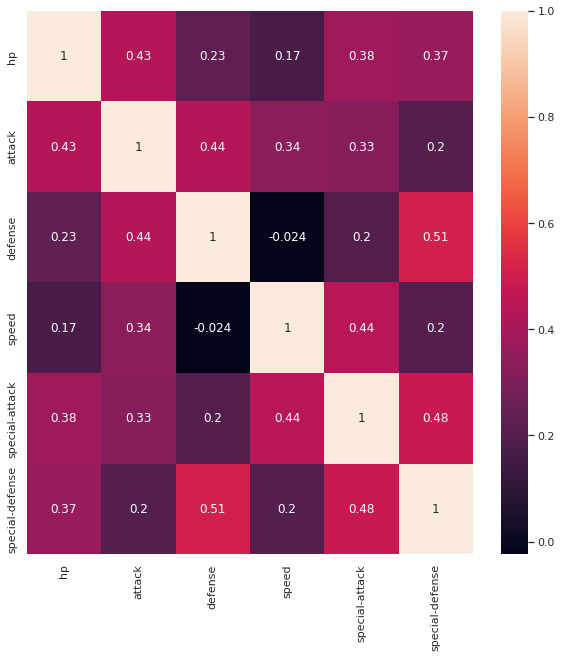

In [94]:
sns.heatmap(pk.loc[:, ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']].corr(),
            annot= True)

[Text(0.5, 1.0, 'correlations')]

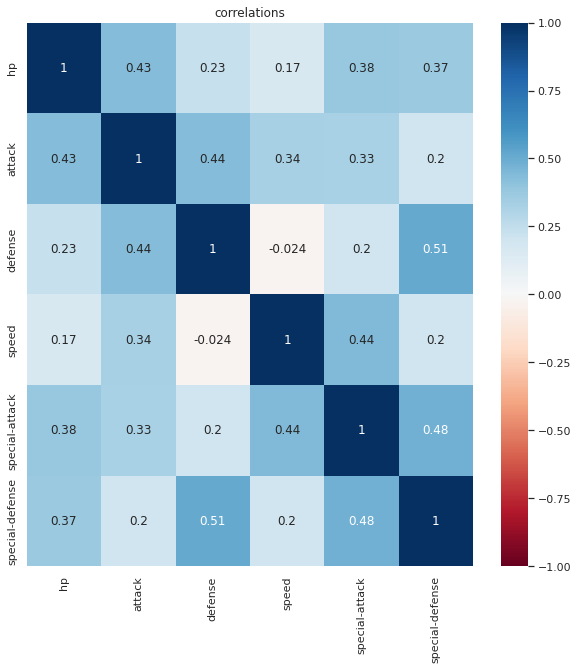

In [22]:
# with different color scheme
sns.heatmap(pk.loc[:, ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']].corr(),
            annot= True, # show the correlation
            center = 0,
            cmap= 'RdBu',
            vmin=-1, vmax=1).set(title = 'correlations') # from -1 to 1 

- defense and speed are slightly negatively correlated
- special-defense and defense are positively correlated 
- all other status are weakly positively correlated 
 

lets see if there is relationship between defense, special-defence and speed 

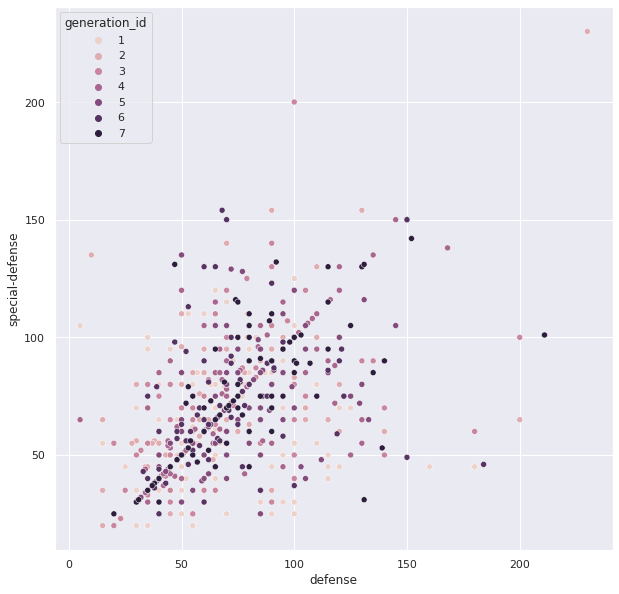

In [26]:

g = sns.scatterplot(data = pk, x = 'defense', y = 'special-defense', hue = 'generation_id' )

## TODO chose a better plot

When the scatterplot is too densed, it is better to use hexplot

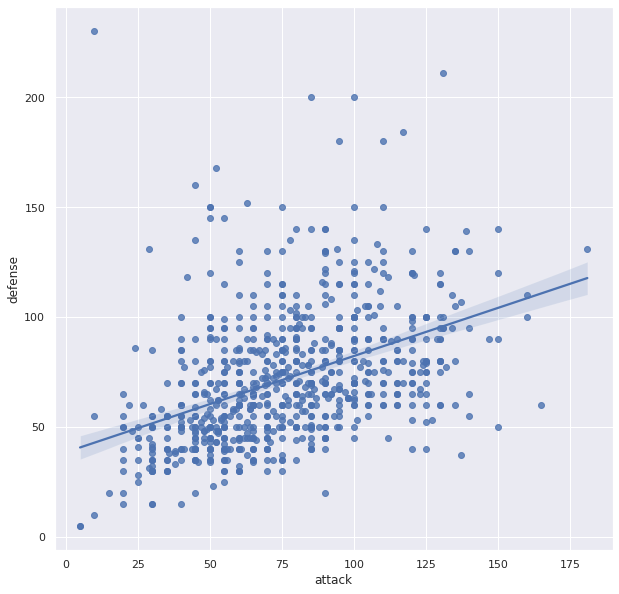

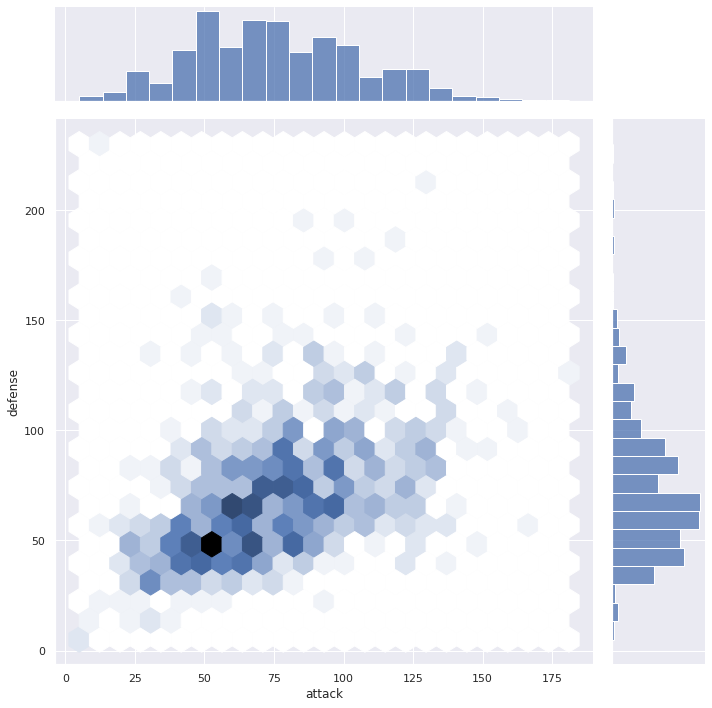

In [23]:

sns.regplot(x = pk.attack, y = pk.defense)
sns.jointplot(x = pk.attack, y = pk.defense, kind = 'hex',height = 10)

Let's look at the average change of stats over generation using line graph

In [44]:
avg_by_gen = pk.groupby('generation_id').mean()[['hp', 
'attack', 'defense', 'special-attack', 'special-defense', 'speed']]

avg_by_gen


,hp,attack,defense,special-attack,special-defense,speed
generation_id,,,,,,
1,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
2,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000
3,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815
4,73.102804,80.214953,75.205607,73.280374,74.476636,69.476636
5,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154
6,68.916667,72.500000,75.222222,72.541667,74.722222,65.680556
7,70.558140,84.325581,78.139535,75.127907,75.139535,66.104651


<AxesSubplot:xlabel='generation_id'>

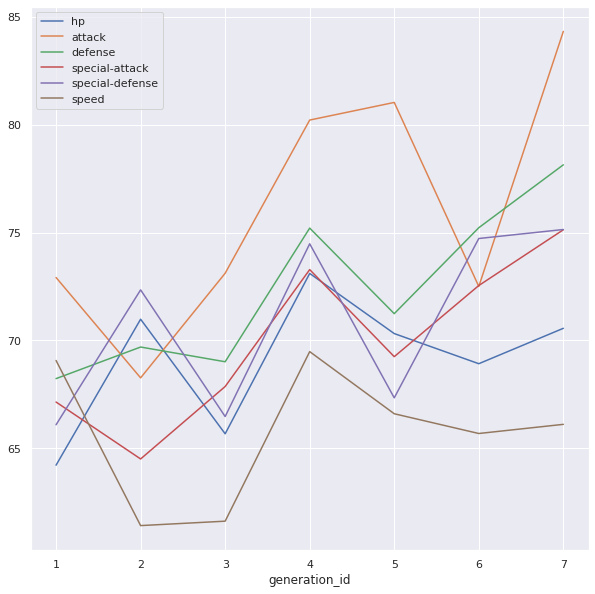

In [46]:
avg_by_gen.plot.line()

The pie chart of types of pokemon

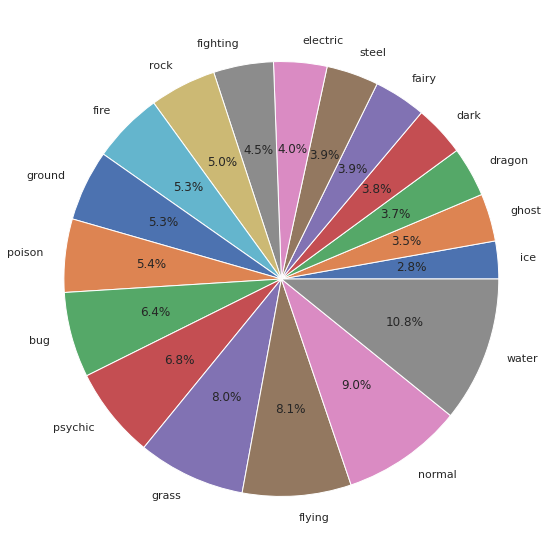

In [88]:
value1 = pk.type_1.value_counts()
value2 = pk.type_2.value_counts()

comb = (value1 + value2).sort_values()

labels = comb.index

plt.pie(comb, labels= labels, autopct='%1.1f%%') # show the percentage to 1 decimal
plt.show()